## Calculating new dependent and independent variables, and modelling

In [3]:
import pandas as pd
import numpy as np

FILE_PATH = r"../generated_data/cp3_modelling/"

In [4]:
df_epi = pd.read_csv(FILE_PATH+"epidemiology_subset.csv")
df_search_trends = pd.read_csv(FILE_PATH+"google-search-trends_subset.csv")
df_gvt_resp = pd.read_csv(FILE_PATH+"government_response_subset.csv")
df_mobility = pd.read_csv(FILE_PATH+"mobility_subset.csv")
df_vacc_search = pd.read_csv(FILE_PATH+"vaccination_search_subset.csv")
df_vacc = pd.read_csv(FILE_PATH+"vaccinations_subset.csv")

df_index = pd.read_csv(r"../datasets/index.csv")
df_demographics = pd.read_csv(r"../datasets/demographics.csv")

### Part 2: What factors influence the government's response?
Independent variable - the old and basic stringency index

Dependent variables (representative of the key metrics for spread of covid - dynamic more than static situation)- deaths, cases, total number of vaccinations, number of new vaccinations (all these should be normalised)

In [5]:
df_epi.head()

,Unnamed: 0,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,982706,2020-01-01,GB,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,982707,2020-01-02,GB,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,982708,2020-01-03,GB,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
3,982709,2020-01-04,GB,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
4,982710,2020-01-05,GB,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN


Variables to select: new_confirmed, new_deceased, new_recovered, new_tested 

Don't need to look at cumulative statistics since what matters is the rate?

In [6]:
df_vacc.head()

,Unnamed: 0,date,location_key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,new_persons_vaccinated_pfizer,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
0,402023,2021-01-10,GB,NaN,2286572.0,NaN,391399.0,NaN,2677971.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,402024,2021-01-11,GB,145076.0,2431648.0,20768.0,412167.0,165844.0,2843815.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,402025,2021-01-12,GB,207661.0,2639309.0,16065.0,428232.0,223726.0,3067541.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,402026,2021-01-13,GB,278943.0,2918252.0,9745.0,437977.0,288688.0,3356229.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,402027,2021-01-14,GB,316694.0,3234946.0,5257.0,443234.0,321951.0,3678180.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Variables to select: new_persons_vaccinated, cumulative_persons_vaccinated, new_persons_fully_vaccinated, cumulative_persons_fully_vaccinated

In [ ]:
df_gvt_resp.head()

,Unnamed: 0,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,public_information_campaigns,facial_coverings,vaccination_policy,date,location_key,stringency_index
0,120759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,GB,0.0
1,120760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-02,GB,0.0
2,120761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-03,GB,0.0
3,120762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-04,GB,0.0
4,120763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-05,GB,0.0


In [7]:
# Consolidate variables into 1 df
df_part2 = df_epi[["date", "location_key", "new_confirmed", "new_deceased", "new_recovered", "new_tested"]].merge(df_vacc[["date", "location_key", "new_persons_vaccinated", "cumulative_persons_vaccinated", "new_persons_fully_vaccinated", "cumulative_persons_fully_vaccinated"]], how = "outer", on = ["date", "location_key"])

In [9]:
df_part2.head()

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated
0,2020-01-01,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_part2 = df_part2.merge(df_gvt_resp[["date", "location_key", "stringency_index"]], how = "outer", on = ["date", "location_key"])

df_part2.head()

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,stringency_index
0,2020-01-01,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2020-01-02,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2020-01-03,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2020-01-04,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2020-01-05,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [11]:
df_part2["date"] = pd.to_datetime(df_part2["date"])
df_part2 = df_part2.set_index("date")

### Standardise metrics by population

i.e. newly tested persons per 10,000 people

In [12]:
# Split dataset into 3 countries
df_part2_gb = df_part2.loc[df_part2["location_key"] == "GB"]
df_part2_id = df_part2.loc[df_part2["location_key"] == "ID"]
df_part2_sg = df_part2.loc[df_part2["location_key"] == "SG"]

In [13]:
columns_to_standardise = df_part2.columns.difference(["date", "location_key", "stringency_index"], sort = False)
columns_to_standardise

Index(['new_confirmed', 'new_deceased', 'new_recovered', 'new_tested',
       'new_persons_vaccinated', 'cumulative_persons_vaccinated',
       'new_persons_fully_vaccinated', 'cumulative_persons_fully_vaccinated'],
      dtype='object')

In [14]:
df_demographics.head()

,location_key,population,population_male,population_female,population_rural,population_urban,population_largest_city,population_clustered,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
0,AD,77265.0,58625.0,55581.0,9269.0,67873.0,NaN,NaN,164.394,0.858,9370.0,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,4881.0
1,AE,9890400.0,6836349.0,3054051.0,1290785.0,8479744.0,2833079.0,5914068.0,118.306,0.863,1011713.0,842991.0,2149343.0,3169314.0,1608109.0,797913.0,242707.0,55884.0,12426.0
2,AF,38928341.0,19976265.0,18952076.0,28244481.0,9797273.0,4114030.0,4114030.0,59.627,0.498,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0
3,AF_BAL,1509183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AF_BAM,495557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
pop_gb = df_demographics["population"].loc[df_demographics["location_key"] == "GB"].iloc[0]
pop_id  = df_demographics["population"].loc[df_demographics["location_key"] == "ID"].iloc[0]
pop_sg = df_demographics["population"].loc[df_demographics["location_key"] == "SG"].iloc[0]

In [16]:
df_part2_gb

,location_key,new_confirmed,new_deceased,new_recovered,new_tested,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,stringency_index
date,,,,,,,,,,
2020-01-01,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-01-02,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-01-03,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-01-04,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-01-05,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-09-09,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-10,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-11,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_part2_gb[columns_to_standardise] = df_part2_gb[columns_to_standardise].apply(lambda x : (x / pop_gb) * 10000)

df_part2_gb

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,location_key,new_confirmed,new_deceased,new_recovered,new_tested,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,stringency_index
date,,,,,,,,,,
2020-01-01,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-01-02,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-01-03,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-01-04,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-01-05,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-09-09,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-10,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-11,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_part2_id[columns_to_standardise] = df_part2_id[columns_to_standardise].apply(lambda x : (x / pop_id) * 10000)

df_part2_id

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,location_key,new_confirmed,new_deceased,new_recovered,new_tested,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,stringency_index
date,,,,,,,,,,
2020-01-01,ID,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2020-01-02,ID,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2020-01-03,ID,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.56
2020-01-04,ID,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.56
2020-01-05,ID,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.56
...,...,...,...,...,...,...,...,...,...,...
2022-09-11,ID,0.070890,0.000475,0.099626,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-12,ID,0.067563,0.000622,0.126680,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-13,ID,0.105878,0.000731,0.132237,NaN,16.341441,7453.921173,5.199039,6233.416126,NaN


In [19]:
df_part2_sg[columns_to_standardise] = df_part2_sg[columns_to_standardise].apply(lambda x : (x / pop_sg) * 10000)

df_part2_sg

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,location_key,new_confirmed,new_deceased,new_recovered,new_tested,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,stringency_index
date,,,,,,,,,,
2020-01-01,SG,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.56
2020-01-02,SG,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,19.44
2020-01-03,SG,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,19.44
2020-01-04,SG,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,19.44
2020-01-05,SG,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,19.44
...,...,...,...,...,...,...,...,...,...,...
2022-09-09,SG,6.908997,0.001709,NaN,NaN,0.196570,8587.906726,0.589709,8553.619848,NaN
2022-09-10,SG,2.461394,0.000000,NaN,NaN,0.138453,8588.045180,0.429035,8554.048882,NaN
2022-09-11,SG,2.483615,0.000000,NaN,NaN,0.039314,8588.084494,0.147000,8554.195882,NaN


### Replace all NAs with ffill (since it is unlikely that there will actually be 0 cases deceased or confirmed daily)

If there are still NAs, replace with 0

In [20]:
df_part2_gb.isna().sum()

location_key                             0
new_confirmed                            0
new_deceased                             0
new_recovered                          987
new_tested                             207
new_persons_vaccinated                 382
cumulative_persons_vaccinated          381
new_persons_fully_vaccinated           382
cumulative_persons_fully_vaccinated    381
stringency_index                        50
dtype: int64

In [21]:
df_part2_gb.interpolate(method = "ffill").isna().sum()

location_key                             0
new_confirmed                            0
new_deceased                             0
new_recovered                          987
new_tested                              90
new_persons_vaccinated                 376
cumulative_persons_vaccinated          375
new_persons_fully_vaccinated           376
cumulative_persons_fully_vaccinated    375
stringency_index                         0
dtype: int64

In [22]:
df_part2_gb = df_part2_gb.interpolate(method = "ffill")
df_part2_gb = df_part2_gb.fillna(0)

In [23]:
df_part2_id = df_part2_id.interpolate(method = "ffill")
df_part2_id = df_part2_id.fillna(0)

In [24]:
df_part2_sg = df_part2_sg.interpolate(method = "ffill")
df_part2_sg = df_part2_sg.fillna(0)

### Train model for part 2

One model for each country

In [25]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## England

In [27]:
# Instantiate models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(max_depth=3, random_state = 1)
random_forest = RandomForestRegressor(n_estimators = 10, random_state=1)

models = [linear_reg, decision_tree, random_forest]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df_part2_gb[columns_to_standardise], df_part2_gb["stringency_index"], test_size = 0.2, random_state =1)

In [29]:
trained_models_gb = {"model" : [], "predicted_results" : [], "train_score": [], "test_score": []}

for model in models :
    model.fit(x_train, y_train)
    y_pred_t = model.predict(x_train)
    mse_t = mean_squared_error(y_train, y_pred_t)
    rmse_t = np.sqrt(mse_t)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    trained_models_gb["model"].append(model)
    trained_models_gb["predicted_results"].append(y_pred)
    trained_models_gb["train_score"].append(rmse_t)
    trained_models_gb["test_score"].append(rmse)

In [30]:
for x in range(len(trained_models_gb['model'])):
    print('Training Score for', trained_models_gb['model'][x], ':', trained_models_gb['train_score'][x])
    print('Testing Score for', trained_models_gb['model'][x], ':', trained_models_gb['test_score'][x])

Training Score for LinearRegression() : 14.25123165986749
Testing Score for LinearRegression() : 13.757359602970002
Training Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 8.124519392080904
Testing Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 7.950301744809118
Training Score for RandomForestRegressor(n_estimators=10, random_state=1) : 1.333679409633828
Testing Score for RandomForestRegressor(n_estimators=10, random_state=1) : 1.9478406676209097


### The Linear Regression Model

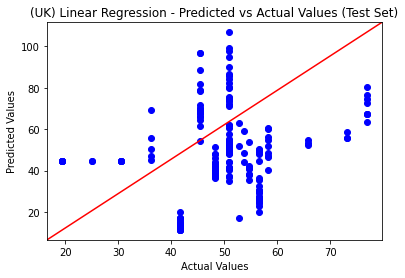

In [63]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_gb["predicted_results"][0], color = 'blue')
plt.title('(UK) Linear Regression - Predicted vs Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()


In [32]:
model_coefficients = trained_models_gb["model"][0].coef_
feature_names = x_train.columns
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coef Val'])
coefficients_df['Abs Coef Val'] = abs(coefficients_df['Coef Val'])
print(coefficients_df)

                                         Coef Val  Abs Coef Val
new_confirmed                       -5.286789e-01  5.286789e-01
new_deceased                         2.476894e+02  2.476894e+02
new_recovered                       -1.733010e-10  1.733010e-10
new_tested                           2.077381e-01  2.077381e-01
new_persons_vaccinated              -2.688581e-02  2.688581e-02
cumulative_persons_vaccinated        7.602956e-05  7.602956e-05
new_persons_fully_vaccinated         9.898757e-02  9.898757e-02
cumulative_persons_fully_vaccinated -5.534962e-03  5.534962e-03


Text(0.5, 0, 'Absolute Value of Coefficients')

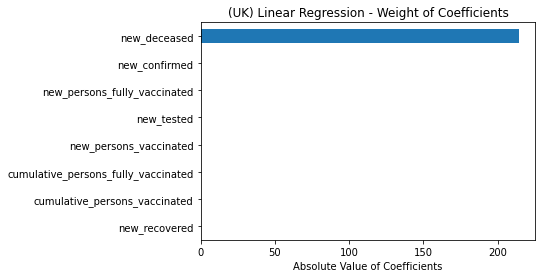

In [66]:
ax = coefficients_df.sort_values(by=['Abs Coef Val']).plot.barh(y='Abs Coef Val', legend = False)

plt.title('(UK) Linear Regression - Weight of Coefficients')
plt.xlabel('Absolute Value of Coefficients')

# Looks like death is the strongest contributor to how strict govt response will be in GB

### The Decision Tree

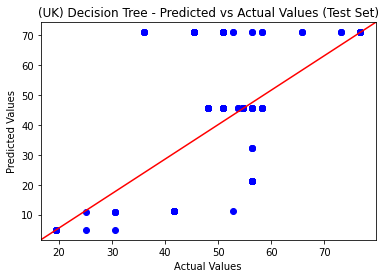

In [67]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_gb["predicted_results"][1], color = 'blue')
plt.title('(UK) Decision Tree - Predicted vs Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

Text(0.5, 1.0, '(UK) Decision Tree Model')

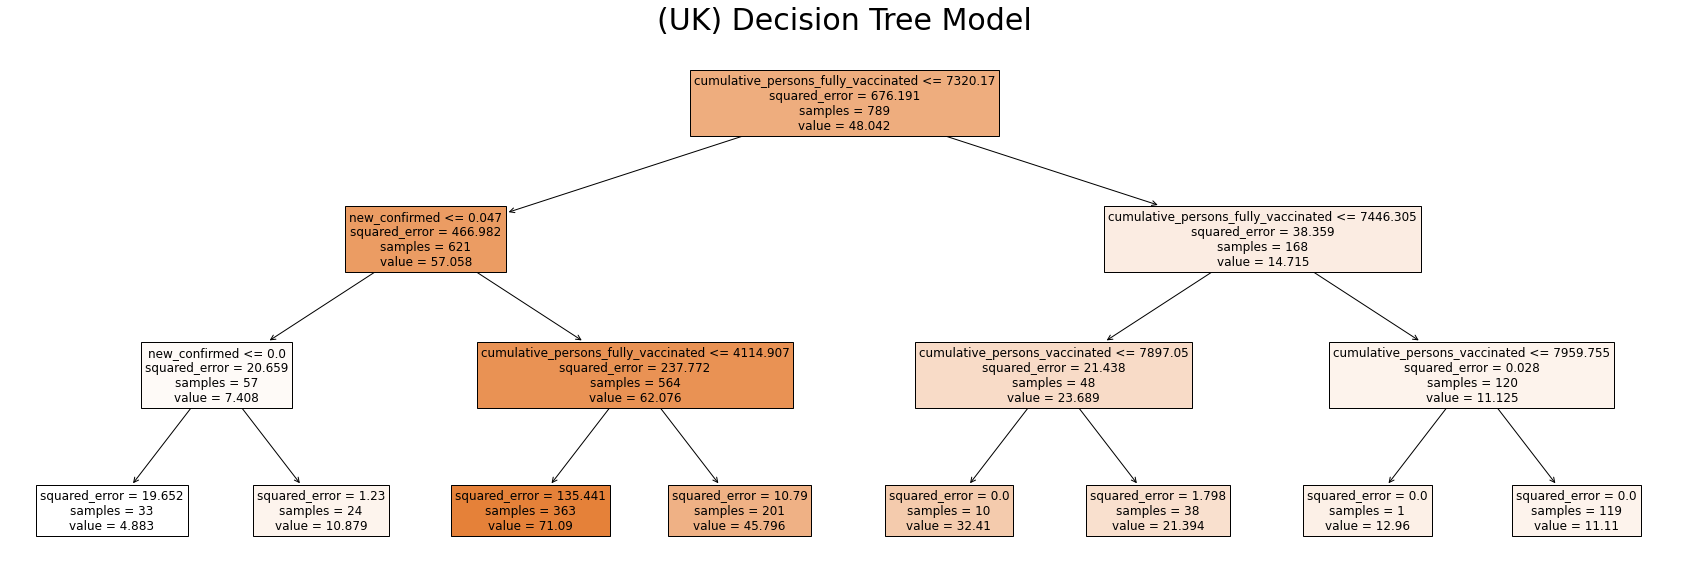

In [68]:
model = trained_models_gb["model"][1]

fig = plt.figure(figsize=(30,10))
_ = tree.plot_tree(model, feature_names=feature_names, filled=True, fontsize = 12)

plt.title('(UK) Decision Tree Model', fontsize = 30)

### The Random Forest

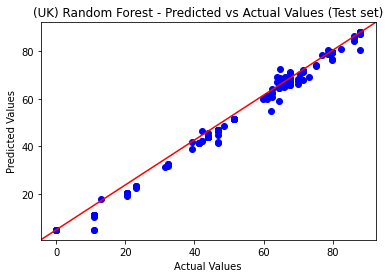

In [36]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_gb["predicted_results"][2], color = 'blue')
plt.title('(UK) Random Forest - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

In [37]:
df_temp = pd.DataFrame(
    {"feature_importance" : trained_models_gb["model"][2].feature_importances_,
    "feature_names" : trained_models_gb["model"][2].feature_names_in_})

df_temp

,feature_importance,feature_names
0,0.310238,new_confirmed
1,0.038731,new_deceased
2,0.000000,new_recovered
3,0.030009,new_tested
4,0.003379,new_persons_vaccinated
5,0.366923,cumulative_persons_vaccinated
6,0.003216,new_persons_fully_vaccinated
7,0.247504,cumulative_persons_fully_vaccinated


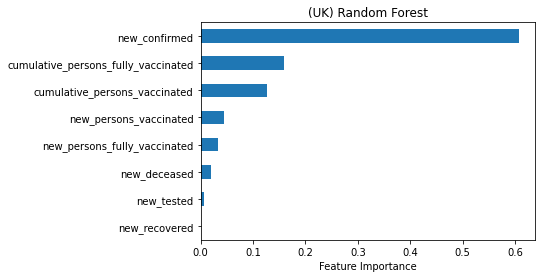

In [85]:
ax = df_temp.sort_values(by=['feature_importance']).plot.barh(y='feature_importance', x = "feature_names", legend = False)

plt.title('(UK) Random Forest')
plt.ylabel("")
plt.xlabel('Feature Importance');

## Indonesia

In [39]:
# Instantiate models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(max_depth=3, random_state = 1)
random_forest = RandomForestRegressor(n_estimators = 10, random_state=1)

models = [linear_reg, decision_tree, random_forest]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(df_part2_id[columns_to_standardise], df_part2_id["stringency_index"], test_size = 0.2, random_state =1)

In [41]:
trained_models_id = {"model" : [], "predicted_results" : [], "train_score": [], "test_score": []}

for model in models :
    model.fit(x_train, y_train)
    y_pred_t = model.predict(x_train)
    mse_t = mean_squared_error(y_train, y_pred_t)
    rmse_t = np.sqrt(mse_t)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    trained_models_id["model"].append(model)
    trained_models_id["predicted_results"].append(y_pred)
    trained_models_id["train_score"].append(rmse_t)
    trained_models_id["test_score"].append(rmse)

In [42]:
for x in range(len(trained_models_id['model'])):
    print('Training Score for', trained_models_id['model'][x], ':', trained_models_id['train_score'][x])
    print('Testing Score for', trained_models_id['model'][x], ':', trained_models_id['test_score'][x])

Training Score for LinearRegression() : 13.189289791781452
Testing Score for LinearRegression() : 13.011483429325615
Training Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 6.279466001108424
Testing Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 6.536175406473187
Training Score for RandomForestRegressor(n_estimators=10, random_state=1) : 3.342557968907037
Testing Score for RandomForestRegressor(n_estimators=10, random_state=1) : 3.7906533484285014


### The Linear Regression Model

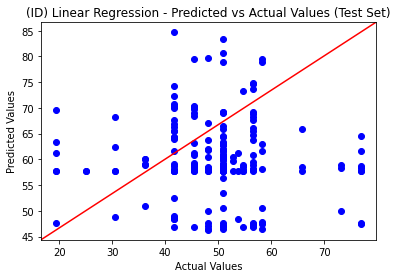

In [81]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_id["predicted_results"][0], color = 'blue')
plt.title('(ID) Linear Regression - Predicted vs Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()


In [44]:
model_coefficients = trained_models_id["model"][0].coef_
feature_names = x_train.columns
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coef Val'])
coefficients_df['Abs Coef Val'] = abs(coefficients_df['Coef Val'])
print(coefficients_df)

                                      Coef Val  Abs Coef Val
new_confirmed                         1.527578      1.527578
new_deceased                         30.314625     30.314625
new_recovered                         6.036164      6.036164
new_tested                            1.011445      1.011445
new_persons_vaccinated                0.058264      0.058264
cumulative_persons_vaccinated         0.008122      0.008122
new_persons_fully_vaccinated         -0.073466      0.073466
cumulative_persons_fully_vaccinated  -0.012108      0.012108


Text(0.5, 0, 'Absolute Value of Coefficients')

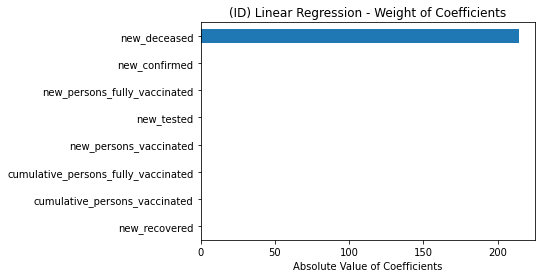

In [74]:
ax = coefficients_df.sort_values(by=['Abs Coef Val']).plot.barh(y='Abs Coef Val', legend = False)

plt.title('(ID) Linear Regression - Weight of Coefficients')
plt.xlabel('Absolute Value of Coefficients')

### The Decision Tree

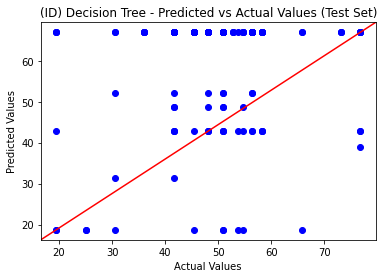

In [83]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_id["predicted_results"][1], color = 'blue')
plt.title('(ID) Decision Tree - Predicted vs Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

Text(0.5, 1.0, '(ID) Decision Tree Model')

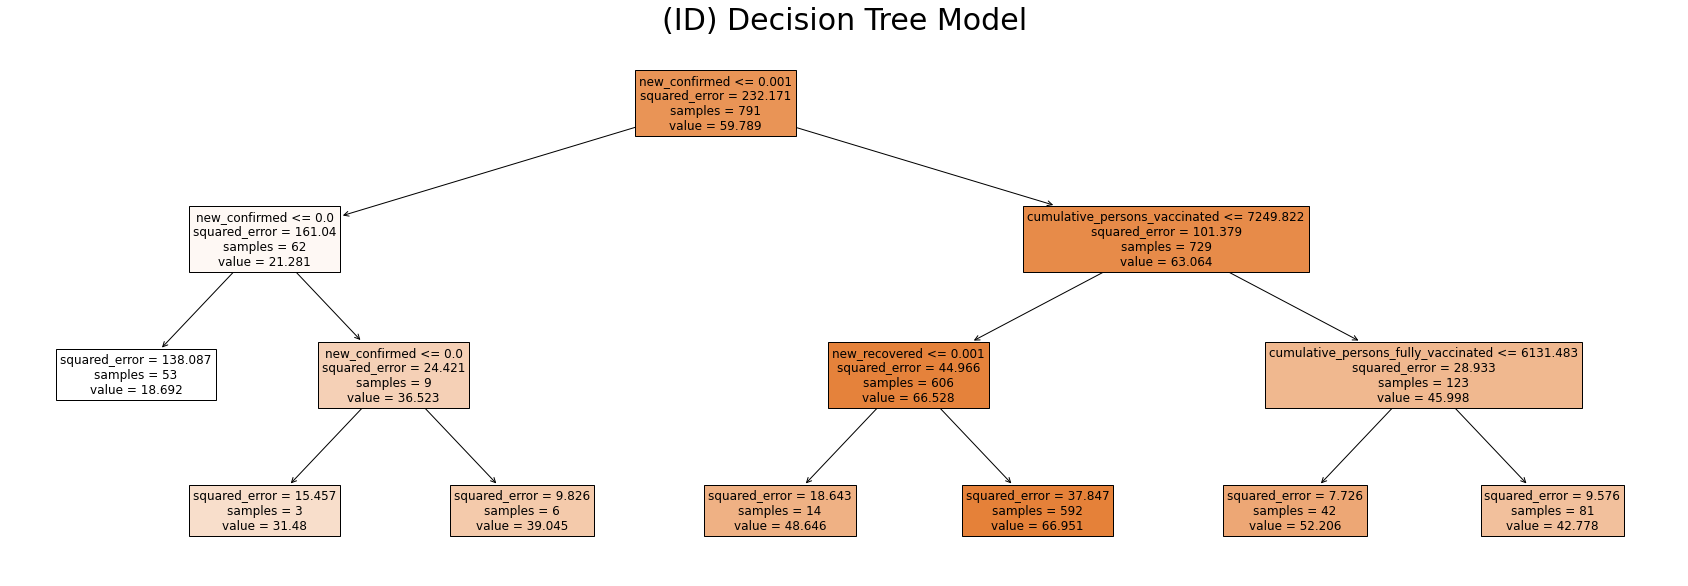

In [75]:
model = trained_models_id["model"][1]

fig = plt.figure(figsize=(30,10))
_ = tree.plot_tree(model, feature_names=feature_names, filled=True, fontsize = 12)

plt.title('(ID) Decision Tree Model', fontsize = 30);

### The Random Forest

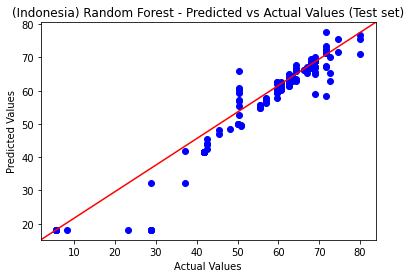

In [48]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_id["predicted_results"][2], color = 'blue')
plt.title('(Indonesia) Random Forest - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

In [49]:
df_temp = pd.DataFrame(
    {"feature_importance" : trained_models_id["model"][2].feature_importances_,
    "feature_names" : trained_models_id["model"][2].feature_names_in_})

df_temp

,feature_importance,feature_names
0,0.614236,new_confirmed
1,0.016696,new_deceased
2,0.071099,new_recovered
3,0.003218,new_tested
4,0.003706,new_persons_vaccinated
5,0.119695,cumulative_persons_vaccinated
6,0.002209,new_persons_fully_vaccinated
7,0.169141,cumulative_persons_fully_vaccinated


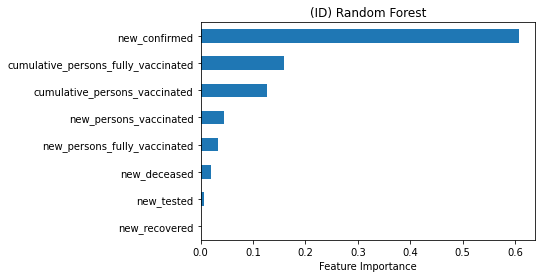

In [86]:
ax = df_temp.sort_values(by=['feature_importance']).plot.barh(y='feature_importance', x = "feature_names", legend = False)

plt.title('(ID) Random Forest')
plt.xlabel('Feature Importance');
plt.ylabel('');



## Singapore

In [51]:
# Instantiate models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(max_depth=3, random_state = 1)
random_forest = RandomForestRegressor(n_estimators = 10, random_state=1)

models = [linear_reg, decision_tree, random_forest]

In [52]:
x_train, x_test, y_train, y_test = train_test_split(df_part2_sg[columns_to_standardise], df_part2_sg["stringency_index"], test_size = 0.2, random_state =1)

In [53]:
trained_models_sg = {"model" : [], "predicted_results" : [], "train_score": [], "test_score": []}

for model in models :
    model.fit(x_train, y_train)
    y_pred_t = model.predict(x_train)
    mse_t = mean_squared_error(y_train, y_pred_t)
    rmse_t = np.sqrt(mse_t)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    trained_models_sg["model"].append(model)
    trained_models_sg["predicted_results"].append(y_pred)
    trained_models_sg["train_score"].append(rmse_t)
    trained_models_sg["test_score"].append(rmse)

In [54]:
for x in range(len(trained_models_sg['model'])):
    print('Training Score for', trained_models_sg['model'][x], ':', trained_models_sg['train_score'][x])
    print('Testing Score for', trained_models_sg['model'][x], ':', trained_models_sg['test_score'][x])

Training Score for LinearRegression() : 10.08234408200122
Testing Score for LinearRegression() : 10.007676584747312
Training Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 7.043189481612001
Testing Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 7.064390958133345
Training Score for RandomForestRegressor(n_estimators=10, random_state=1) : 3.2285674259436727
Testing Score for RandomForestRegressor(n_estimators=10, random_state=1) : 5.079548288484626


### The Linear Regression Model

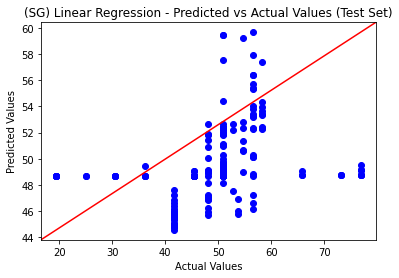

In [82]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_sg["predicted_results"][0], color = 'blue')
plt.title('(SG) Linear Regression - Predicted vs Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()


In [56]:
model_coefficients = trained_models_sg["model"][0].coef_
feature_names = x_train.columns
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coef Val'])
coefficients_df['Abs Coef Val'] = abs(coefficients_df['Coef Val'])
print(coefficients_df)

                                         Coef Val  Abs Coef Val
new_confirmed                        6.635539e-02  6.635539e-02
new_deceased                         2.147557e+02  2.147557e+02
new_recovered                        3.725308e-12  3.725308e-12
new_tested                           2.269736e-02  2.269736e-02
new_persons_vaccinated               1.973299e-02  1.973299e-02
cumulative_persons_vaccinated        3.326879e-03  3.326879e-03
new_persons_fully_vaccinated        -2.930903e-02  2.930903e-02
cumulative_persons_fully_vaccinated -3.951922e-03  3.951922e-03


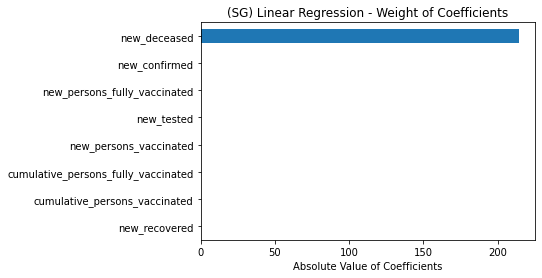

In [77]:

ax = coefficients_df.sort_values(by=['Abs Coef Val']).plot.barh(y='Abs Coef Val', legend = False)

plt.title('(SG) Linear Regression - Weight of Coefficients')
plt.xlabel('Absolute Value of Coefficients');


### The Decision Tree

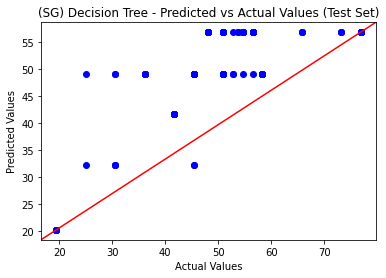

In [84]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_sg["predicted_results"][1], color = 'blue')
plt.title('(SG) Decision Tree - Predicted vs Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

Text(0.5, 1.0, '(SG) Decision Tree Model')

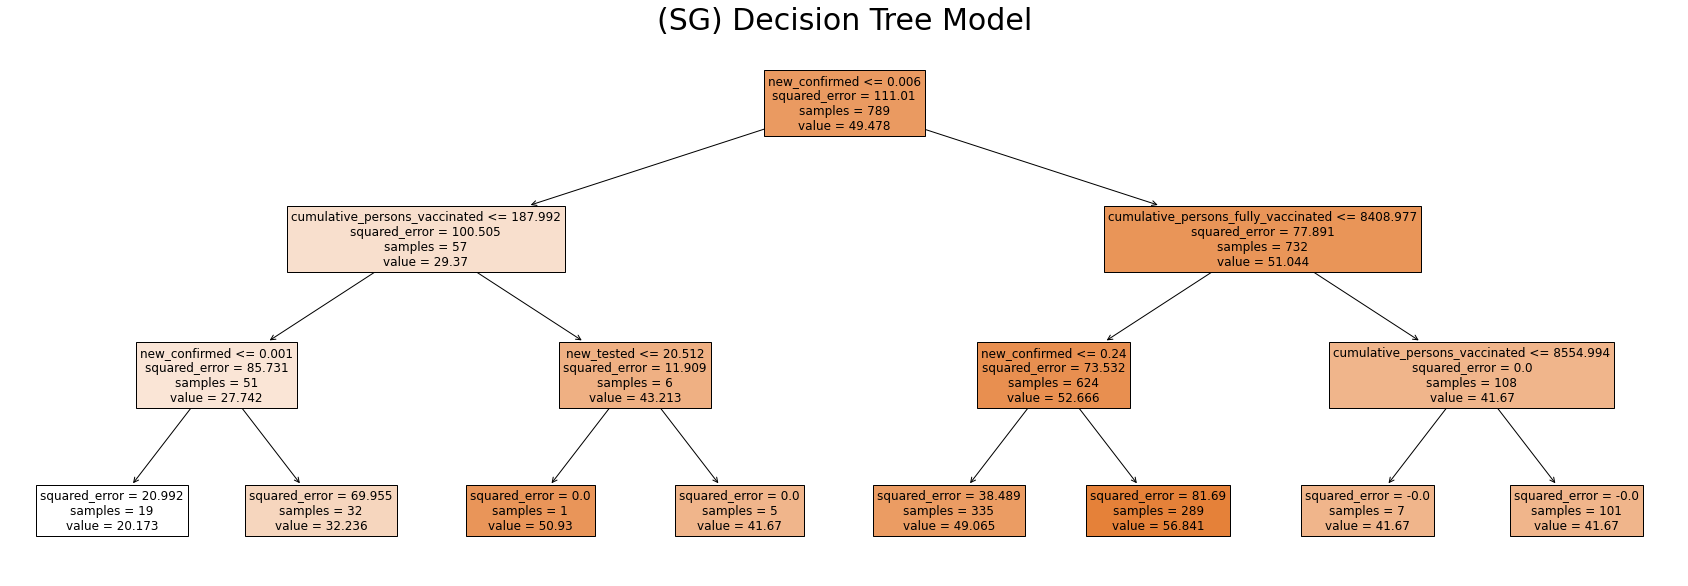

In [78]:
model = trained_models_sg["model"][1]

fig = plt.figure(figsize=(30,10))
_ = tree.plot_tree(model, feature_names=feature_names, filled=True, fontsize = 12)


plt.title('(SG) Decision Tree Model', fontsize = 30)

### The Random Forest

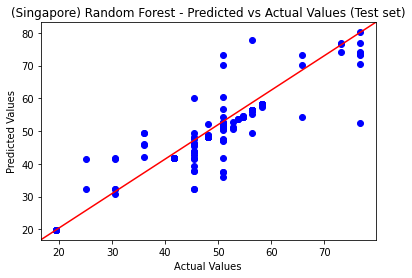

In [60]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_sg["predicted_results"][2], color = 'blue')
plt.title('(Singapore) Random Forest - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

In [61]:
df_temp = pd.DataFrame(
    {"feature_importance" : trained_models_sg["model"][2].feature_importances_,
    "feature_names" : trained_models_sg["model"][2].feature_names_in_})

df_temp

,feature_importance,feature_names
0,0.608016,new_confirmed
1,0.020541,new_deceased
2,0.000000,new_recovered
3,0.007306,new_tested
4,0.044017,new_persons_vaccinated
5,0.126831,cumulative_persons_vaccinated
6,0.033786,new_persons_fully_vaccinated
7,0.159503,cumulative_persons_fully_vaccinated


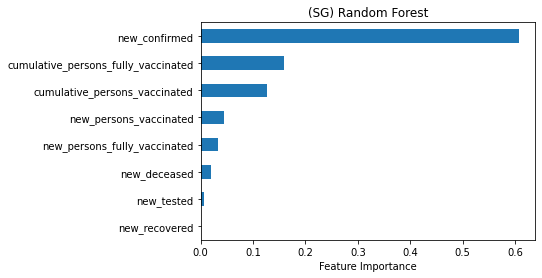

In [87]:
ax = df_temp.sort_values(by=['feature_importance']).plot.barh(y='feature_importance', x = "feature_names", legend = False)

plt.title('(SG) Random Forest')
plt.xlabel('Feature Importance');
plt.ylabel('');


In [62]:
'''

# Linear Regression

ax = coefficients_df.sort_values(by=['Abs Coef Val']).plot.barh(y='Abs Coef Val', legend = False)

plt.title('(UK) Linear Regression - Weight of Coefficients')
plt.xlabel('Absolute Value of Coefficients');

# Decision Tree

plt.title('(UK) Decision Tree Model', fontsize = 30);

# Random Forest

ax = df_temp.sort_values(by=['feature_importance']).plot.barh(y='feature_importance', x = "feature_names", legend = False)

plt.title('(UK) Random Forest')
plt.xlabel('Feature Importance');

'''